머신러닝
4. 기계 학습시 데이터를 생성하고 변형모델에 입력할 경우 3가지 상황
  - 기존 데이터 액세스하는 방법
  - 랜덤 데이터 생성하는 방법
  - model에 데이터를 입력 할때 구조와 대체 데이터 저장하는 방법
  
5. X, Y[출력 변수] : 데이터 형식의...

6. 랜덤 데이터 생성하는 방법 : make_000로 시작하는 함수가 호출되는 데이터로 매개변수를 조절해서 레이블이 있는 데이터를 생성할 수 있다.

   dataset                     데이터 종류         데이터수     차원         클래스 수        데이터분포조정
make_blobs                 가우시안 데이터생성    n_samples    n_features    centers        cluster_std, cluster_box
make_classification        n-class 분류용데이터   n_samples    n_features    n_classes      많다, 복잡하다.
make_gaussian_quantiles    분류생성               n_samples    n_features    n_classes      mean, cov
make_circle                원형분포               n_samples    2             2              factor

7. 기계학습의 흐름
  데이터 수집 -> 전처리 -> 데이터 분할 -> 학습하기 -> 테스트 평가하기
  
    1) 데이터 분할 : sklearn.model_selection.train_test_split
    
    2) 학습하기_(다양한 패턴의 알고리즘) : sklearn.ensemble.RandomForestClassifier 등 sklearn.ensemble.*
        2-1) ensemble(집단학습) : 미학습 데이터에 대한 예측 능력을 평가하는 것
                           : 단일 학습, 융합
                           : 복잡한 학습 -> 독립적, 간단한 학습 -> 순차적
                           : 랜덤포레스트, 부트스트랩의 두가지 관점으로 나뉜다.
                    
        2-2) RandomForest는 무슨 알고리즘 ?
             부트스트랩 표본 추출 -> 학습데이터에서 n개의 샘플을 무작위로 선택
             [부트스트랩의 표본에서 결정 나무를 생성] -> 임의의 d개의 특징된 양을 추출
                                                         (목적함수에 따라 최적의 분할이 되는 특징량을 사용하여 노드를 분할)
             예측 된 결과를 리턴
    
    3) 테스트 평가하기 : sklearn.metrics.accuracy_score 등    sklearn.metrics.*
    
    * 입출력함수가 정해져 있기 때문에 데이터 전체 구현하기전에 체크
        model.fit(X,y), model.fit(X), model.predict(X) : 모델에서 테스트 까지
        
--------> 머신러닝
 1. 다섯단계의 의미
 2. 데이터셋 3가지
 3. sklearn.metrics 모듈의 메소드 (클래스 분류결과)
    TP(true Positive), TN(true negative), FP, FN
    정답률_accuracy_score / 적합율 _ precision_score() / 재현율 _ recall_score() / 평가지표 산출률 Classification_report()
    #F1 값 f1_score() / 매크로평균, 마이크로 평균값, 가중평균값 / 클래스 분류지표
    
 4. 단계별 코드를 전체 구현하면서 알고리즘 패턴을 숙지한다.
 
==========================================================================================

ML sklearn.metrics의 메소드를 살펴 보자.
  8-1) confusion matrix형태의 데이터를 관리한다 : 클래스 분류 결과를 "실제 클래스"와 "예측 클래스"를 축으로 가진 형태
  
      실제 클래스, 예측클래스(두 값의 분류)  ->  4개의 종류로 나뉜다.
      
                              실제클래스     예측 클래스
      TP(true positive)          T                T         (정답)
      TN(true negative)          F                F         (정답)
      FP(False Positive)         F                T         (오답)
      FN(False negative)         T                F         (오답)
      
    ==============>  Predicted
                         negative     Positive
    Actual   negative       TN           FP
             positive       FN           TP
             
  8-2) confusion_matrix() 생성해서 사용한다.
  
  8-3) accuracy_score()
       
       (TP+TN+FP+FN) / (TP+TN)
  
  8-4) 적합율(PPV : positive predictive value) _ precision_score()
       precision = (TP+FP)/TP
       FP가 커지면 적합율은 작아진다.
  
  8-5) 재현율 _ recall_score()
       recall = (TP+FN)/TP
       FN이 커지면 재현율은 작다
       
  8-6) #F1 measure 값 f1.score()
           case 1 : precision + recall / 2*precision*recall
           case 2 : 2*TP + FP + FN / 2 * TP
 
 9. train_test_split() : ndarray객체 및 목록등을 둘로 나누어 리턴하는 기능 함수
                         머신러닝 데이터를 훈련(학습)과 테스트로 분할한다.
   
                         데이터 검증방법 3가지
                          1) 홀드 아웃 검증 : 데이터를 훈련 데이터와 테스트 데이터를 분할 한 다음
                                              테스트 데이터를 사용하지 않는 방법, 테스트 데이터는 평가로 사용
                          
                          2) 교차검증(n겹) : 데이터를 n개의 그룹으로 나누어서 원하는 그룹을 하나 선택한 후 나머지
                             데이터를 훈련데이터로 사용한다. 원하는 그룹을 하나 선택한 것은 테스트 평가
                             테스트데이터에서 정밀도에 평균, 표준편차 구해서 평가 실행(5~10내외로 그룹을 나눈다.)
                          
                          3) LOOCV(Leave- ont-out Cross Validation) : 교차 검증시에 그룹개수와 데이터수가 같을 때 사용하는 검증방법

In [2]:
from sklearn import datasets


In [3]:
data = datasets.load_boston()
print("data shape : ", data.data.shape)
print("feature_names : ", data.feature_names)
print("target value : ", data.target)

data shape :  (506, 13)
feature_names :  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
target value :  [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.

In [5]:
data = datasets.load_iris()
print("data shape : ", data.data.shape)
print("feature_names : ", data.feature_names)
print("target value : ", data.target)
print("class name : ", data.target_names)

data shape :  (150, 4)
feature_names :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target value :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
class name :  ['setosa' 'versicolor' 'virginica']


In [6]:
data = datasets.load_wine()
print("data shape : ", data.data.shape)  # 데이터에 포함된 벡터값
print("feature_names : ", data.feature_names)  # 각 요소의 이름
print("target value : ", data.target)  # 클래스 (범주형 변수)
print("class name : ", data.target_names)  # 클래스이름

data shape :  (178, 13)
feature_names :  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
target value :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
class name :  ['class_0' 'class_1' 'class_2']


In [8]:
from sklearn.utils import shuffle
x,y = shuffle(data.data,data.target, random_state = 0)
print("target value",y)

target value [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 1 2 0 2 2 0 2 0 1 2 2 1 2 2 0 1 2 1 1 2 1 0 1 1 1 0 0
 1 1 2 2 1 1 1 2 2 0 2 1 1 1 1 1 0 0 1 0 2 0 2 0 0 1 0 1 1 0 2 1 0 1 1 1 2
 0 2 2 0 0 1 2 0 0 1 1 0 0 0 2 1 0 1 2 0 1 2 2 0 0 2 0 2 1 0 0 1 0 2 1 2 0
 2 2 2 0 1 1 1 1 2 2 1 1 0 1 2 2 0 0 2 1 1 1 0 0 0 1 1 1 0 2]


In [10]:
#사용자 랜덤 데이터 생성
data,target = datasets.make_multilabel_classification(n_samples=100, n_features=10, n_classes=5,n_labels = 3)
print(type(data),type(target))
print("data : ", data[0])
print("lable : ", target[0])

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
data :  [ 5.  1.  4.  4. 11.  9.  3.  8.  2.  5.]
lable :  [1 1 1 1 1]


In [12]:
#데이터를 가지고 학습 -> 평가 까지 전체 흐름을 살펴보자
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  #지표를 지정해서 n개의 결정나무 앙상블 학습 _wjdalfehfmf rngus
from sklearn.metrics import accuracy_score

#1. 데이터를 로드
iris = datasets.load_iris()
data,target = iris.data, iris.target

In [13]:
#2. 학습과 테스트로 나눈다.
data_train, data_test, target_train, target_test= train_test_split(data,target,train_size = 0.8, random_state = 1)

In [14]:
#3. 모델 지정 = 알고리즘 종류
model = RandomForestClassifier()

In [15]:
#4. 학습
model.fit(data_train,target_train)

RandomForestClassifier()

In [16]:
#5. 테스트 및 평가
target_pred = model.predict(data_test)
print(accuracy_score(target_test,target_pred))  #정답률을 계산한다.
# 정답률_accuracy_score / 적합율 _ precision_score() / 재현율 _ recall_score() / 평가지표 산출률 Classification_report()
# F1 값 f1_score() / 매크로평균, 마이크로 평균값, 가중평균값 / 클래스 분류지표

0.9666666666666667


[[1 4]
 [3 2]]
[1 4 3 2]
1
4
3
2


<AxesSubplot:>

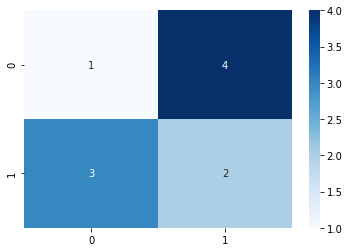

In [26]:
# 기본 클래스 y를 이용한 메소드를 살펴 보자.
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,1,1,1,0,0,0,1,1]
cm = confusion_matrix(y_true, y_pred)
print(cm)
print(cm.flatten()) #1차원으로 풀자
tn,fp,fn,tp = cm.flatten()
print(tn)
print(fp)
print(fn)
print(tp)
sns.heatmap(cm,annot = True, cmap = 'Blues')

In [20]:
# 단어로 구현해 보자
from sklearn.metrics import confusion_matrix
y_true = ['A','A','A','A','A','B','B','B','B','B']
y_pred = ['A','B','B','B','B','A','A','A','B','B']
print(confusion_matrix(y_true, y_pred))

[[1 4]
 [3 2]]


In [21]:
print(confusion_matrix(y_true, y_pred,labels=['A','B']))

[[1 4]
 [3 2]]


In [22]:
print(confusion_matrix(y_true, y_pred,labels=['B','A']))  # labels는 축의 순서를 지정한다.

[[2 3]
 [4 1]]


In [24]:
y_true = [0,0,0,1,1,1,2,2,2]
y_pred = [0,1,1,1,1,2,2,2,2]
print(confusion_matrix(y_true, y_pred))
print(confusion_matrix(y_true, y_pred,labels=[0,0,1]))  

[[1 2 0]
 [0 2 1]
 [0 0 3]]
[[0 0 0]
 [0 1 2]
 [0 0 2]]


In [31]:
# 정답률 확인
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt

y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,1,1,1,0,0,0,1,1]

cm = confusion_matrix(y_true, y_pred)
print(cm)

res = accuracy_score(y_true,y_pred)
print(res)

pre = precision_score(y_true,y_pred)
print(pre)

recall = recall_score(y_true,y_pred)
print(recall)

[[1 4]
 [3 2]]
0.3
0.3333333333333333
0.4


In [36]:
# 정답률 확인
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt

y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,1,1,1,0,0,0,1,1]

cm = confusion_matrix(y_true, y_pred)
print(cm)

pre = precision_score(y_true,y_pred)
print(pre)

pre = precision_score(y_true,y_pred,pos_label = 0)
print(pre)

pre = precision_score(y_true,y_pred,average = None)
print(pre)

# average = 'macro' : Positive, negative 교체해서 두 값의 산술평균을 리턴
pre = precision_score(y_true,y_pred,average = 'macro')
print(pre)

# average = 'micro' : Positive, negative 교체해서 각각의 상태에서 TP와 FP, FN의 적합률 등을 리턴
pre = precision_score(y_true,y_pred,average = 'micro')
print(pre)  #precision = TP / (TP+FP) = (2+1) / ((2+1)+ (4+3)) = 0.3

print(classification_report(y_true,y_pred,target_names = ['class_0','class_1']))

[[1 4]
 [3 2]]
0.3333333333333333
0.25
[0.25       0.33333333]
0.29166666666666663
0.3
              precision    recall  f1-score   support

     class_0       0.25      0.20      0.22         5
     class_1       0.33      0.40      0.36         5

    accuracy                           0.30        10
   macro avg       0.29      0.30      0.29        10
weighted avg       0.29      0.30      0.29        10



In [35]:
y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,1,1,1,0,0,0,1,1]

cm = confusion_matrix(y_true, y_pred)
print(cm)

cm = confusion_matrix(y_true, y_pred,labels = [1,0])
print(cm)

[[1 4]
 [3 2]]
[[2 3]
 [4 1]]


In [41]:
import pprint
d = classification_report(y_true,y_pred,output_dict=True)
pprint.pprint(d)
print(type(d))

{'0': {'f1-score': 0.22222222222222224,
       'precision': 0.25,
       'recall': 0.2,
       'support': 5},
 '1': {'f1-score': 0.3636363636363636,
       'precision': 0.3333333333333333,
       'recall': 0.4,
       'support': 5},
 'accuracy': 0.3,
 'macro avg': {'f1-score': 0.29292929292929293,
               'precision': 0.29166666666666663,
               'recall': 0.30000000000000004,
               'support': 10},
 'weighted avg': {'f1-score': 0.29292929292929293,
                  'precision': 0.29166666666666663,
                  'recall': 0.3,
                  'support': 10}}
<class 'dict'>


In [42]:
import pandas as pd
df = pd.DataFrame(d)
print(df)

                  0         1  accuracy  macro avg  weighted avg
precision  0.250000  0.333333       0.3   0.291667      0.291667
recall     0.200000  0.400000       0.3   0.300000      0.300000
f1-score   0.222222  0.363636       0.3   0.292929      0.292929
support    5.000000  5.000000       0.3  10.000000     10.000000


In [51]:
y_true_m = [0,0,0,1,1,1,2,2,2]
y_pred_m = [0,1,1,1,1,2,2,2,2]
print(confusion_matrix(y_true_m, y_pred_m))

print(precision_score(y_true_m, y_pred_m, average = None))

print(precision_score(y_true_m, y_pred_m, average = 'macro'))

print(precision_score(y_true_m, y_pred_m, average = 'micro'))

print(precision_score(y_true_m, y_pred_m, average = 'weighted'))
print(classification_report(y_true_m, y_pred_m))

[[1 2 0]
 [0 2 1]
 [0 0 3]]
[1.   0.5  0.75]
0.75
0.6666666666666666
0.75
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      0.67      0.57         3
           2       0.75      1.00      0.86         3

    accuracy                           0.67         9
   macro avg       0.75      0.67      0.64         9
weighted avg       0.75      0.67      0.64         9



In [56]:
#sklearn.model_selection.train_test_split()

import numpy as np
from sklearn.model_selection import train_test_split

a = np.arange(10)
print(a)

print(train_test_split(a))
print(type(train_test_split(a)))
print(len(train_test_split(a)))

#1) 데이터 분할
a_train, a_test = train_test_split(a)
print(a_train)
print(a_test)

print("=================================================")
#2) 비율 지정, test_size, train_size = 0.25, -> 10*0.25 = 2.5 -> 3 (0.0~ 1.0) or 개수
a_train, a_test = train_test_split(a, test_size=0.25)  #소수이하 절삭 10*0.25 = 2.5
print(a_train)
print(a_test)


[0 1 2 3 4 5 6 7 8 9]
[array([6, 5, 3, 2, 7, 0, 1]), array([8, 4, 9])]
<class 'list'>
2
[1 4 6 2 3 9 8]
[7 0 5]
[4 8 1 3 7 9 6]
[2 0 5]


In [57]:
print("=================================================")
#4) 비율값 확인

a_train, a_test = train_test_split(a, test_size=0.3, train_size = 0.4)  #소수이하 절삭 10*0.25 = 2.5
print(a_train)
print(a_test)


[6 7 9 5]
[2 8 0]
